# 6.1.4

In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

# 6.2.6

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3558c7e1c8c402d4a6c29dd5a9b4bd79


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | asau
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hurghada
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | kieta
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | ler
Processing Record 15 of Set 1 | makat
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | puerto escondido
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 21 of Set 1 | busselton
Proces

Processing Record 37 of Set 4 | parkersburg
Processing Record 38 of Set 4 | santo antonio do ica
Processing Record 39 of Set 4 | veraval
Processing Record 40 of Set 4 | hami
Processing Record 41 of Set 4 | agaro
Processing Record 42 of Set 4 | dukat
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | solnechnyy
Processing Record 45 of Set 4 | ussel
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | mehamn
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | port elizabeth
Processing Record 2 of Set 5 | chernyshevskiy
Processing Record 3 of Set 5 | la asuncion
Processing Record 4 of Set 5 | cap malheureux
Processing Record 5 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 6 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 7 of Set 5 | ormara
Processing Record 8 of Set 5 | rundu
Processing Record 9 of Set 5

Processing Record 27 of Set 8 | mahates
Processing Record 28 of Set 8 | qandahar
City not found. Skipping...
Processing Record 29 of Set 8 | ulladulla
Processing Record 30 of Set 8 | tabuk
Processing Record 31 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 32 of Set 8 | vallenar
Processing Record 33 of Set 8 | kaniama
Processing Record 34 of Set 8 | bara
Processing Record 35 of Set 8 | cidreira
Processing Record 36 of Set 8 | nioki
Processing Record 37 of Set 8 | faanui
Processing Record 38 of Set 8 | yenagoa
Processing Record 39 of Set 8 | khash
Processing Record 40 of Set 8 | gulshat
City not found. Skipping...
Processing Record 41 of Set 8 | alexandria
Processing Record 42 of Set 8 | lagos
Processing Record 43 of Set 8 | nongstoin
Processing Record 44 of Set 8 | khasan
Processing Record 45 of Set 8 | san andres
Processing Record 46 of Set 8 | clyde river
Processing Record 47 of Set 8 | touros
Processing Record 48 of Set 8 | neyshabur
Processing Record 49 of Set 

Processing Record 17 of Set 12 | karasjok
Processing Record 18 of Set 12 | taquari
Processing Record 19 of Set 12 | poli
Processing Record 20 of Set 12 | huarmey
Processing Record 21 of Set 12 | santa isabel do rio negro
Processing Record 22 of Set 12 | port hueneme
Processing Record 23 of Set 12 | post falls
Processing Record 24 of Set 12 | svetlaya
Processing Record 25 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 26 of Set 12 | lavrentiya
Processing Record 27 of Set 12 | nguiu
City not found. Skipping...
Processing Record 28 of Set 12 | puerto ayacucho
Processing Record 29 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 30 of Set 12 | kamenka
Processing Record 31 of Set 12 | awjilah
Processing Record 32 of Set 12 | saint-francois
Processing Record 33 of Set 12 | martapura
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | kota belud
Processing Record 36 of Set 12 | vigrestad
Processing Record 37 of Set 12 | astoria
Proces

In [19]:
len(city_data)

543

# 6.2.7

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,39.00,83,0,3.00,NZ,2020-06-18 22:47:50
1,Bengkulu,-3.80,102.27,74.95,88,99,4.54,ID,2020-06-18 22:47:51
2,Arraial Do Cabo,-22.97,-42.03,72.64,78,11,22.35,BR,2020-06-18 22:47:51
3,Bredasdorp,-34.53,20.04,44.60,93,0,5.39,ZA,2020-06-18 22:47:51
4,Asau,46.43,26.40,61.00,95,23,4.36,RO,2020-06-18 22:47:33
5,Ushuaia,-54.80,-68.30,33.80,74,18,4.70,AR,2020-06-18 22:47:52
6,Hurghada,27.26,33.81,87.80,25,0,23.04,EG,2020-06-18 22:47:52
7,Nikolskoye,59.70,30.79,66.20,77,75,2.24,RU,2020-06-18 22:47:52
8,Tuktoyaktuk,69.45,-133.04,44.60,81,40,9.17,CA,2020-06-18 22:47:52
9,Kieta,-6.22,155.63,84.69,69,4,0.87,PG,2020-06-18 22:47:53


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-06-18 22:47:50,-46.19,168.86,39.00,83,0,3.00
1,Bengkulu,ID,2020-06-18 22:47:51,-3.80,102.27,74.95,88,99,4.54
2,Arraial Do Cabo,BR,2020-06-18 22:47:51,-22.97,-42.03,72.64,78,11,22.35
3,Bredasdorp,ZA,2020-06-18 22:47:51,-34.53,20.04,44.60,93,0,5.39
4,Asau,RO,2020-06-18 22:47:33,46.43,26.40,61.00,95,23,4.36
...,...,...,...,...,...,...,...,...,...
538,Astoria,US,2020-06-18 22:49:11,46.19,-123.83,70.00,64,1,9.17
539,Oktyabrskiy,RU,2020-06-18 22:50:05,54.48,53.47,45.54,82,0,4.34
540,Adre,TD,2020-06-18 22:50:05,13.47,22.20,76.14,52,37,5.12
541,Saint-Prosper,CA,2020-06-18 22:50:05,46.21,-70.48,82.00,39,0,3.00


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

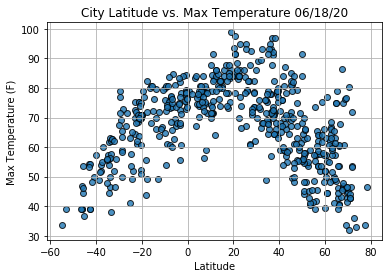

In [25]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2

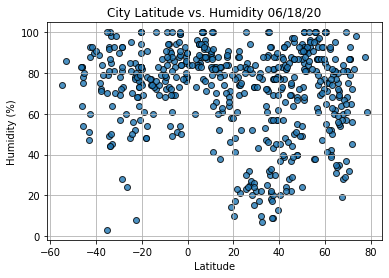

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3

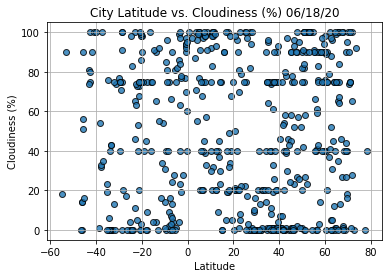

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4

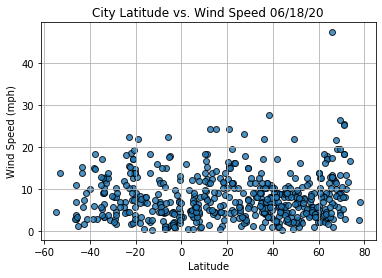

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()